##Prediction Disease

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from googletrans import Translator

In [5]:
pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=0f03d55764e36266e8fa21637946c1f932de2c972609cca51f710d30ff605720
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: googletrans
    Found existing installation: googletrans 3.0.0
    Uninstalling googletrans-3.0.0:
      Successfully uninstalled googletrans-3.0.0


##Input Dataset Training dan Testing dari Disease Dataset

In [3]:
# Kamus untuk menerjemahkan nama penyakit
kamus_penyakit = {
    "itching": "gatal",
    "skin_rash": "ruam kulit",
    "nodal_skin_eruptions": "nodal skin erupsi",
    "continuous_sneezing": "terus menerus bersin",
    "shivering": "gemetaran",
    "chills": "panas dingin",
    "joint_pain": "nyeri sendi",
    "stomach_pain": "sakit perut",
    "acidity": "keasaman",
    "ulcers_on_tongue": "bisul di lidah",
    "muscle_wasting": "pengecilan otot",
    "vomiting": "muntah",
    "burning_micturition": "pembakaran kemih",
    "spotting_ urination": "bercak buang air kecil",
    "fatigue": "kelelahan",
    "weight_gain": "berat penambahan",
    "anxiety": "kecemasan",
    "cold_hands_and_feets": "tangan dan kaki dingin",
    "mood_swings": "suasana hati ayunan",
    "weight_loss": "berat penurunan",
    "restlessness": "kegelisahan",
    "lethargy": "kelesuan",
    "patches_in_throat": "patch in throat",
    "irregular_sugar_level": "kadar gula tidak teratur",
    "cough": "batuk",
    "high_fever": "demam tinggi",
    "sunken_eyes": "cekung mata",
    "breathlessness": "sesak napas",
    "sweating": "berkeringat",
    "dehydration": "dehidrasi",
    "indigestion": "gangguan pencernaan",
    "headache": "sakit kepala",
    "yellowish_skin": "kulit kekuningan",
    "dark_urine": "urin gelap",
    "nausea": "mual",
    "loss_of_appetite": "kehilangan selera makan",
    "pain_behind_the_eyes": "rasa sakit di belakang mata",
    "back_pain": "sakit punggung",
    "constipation": "sembelit",
    "abdominal_pain": "sakit perut",
    "diarrhoea": "diare",
    "mild_fever": "ringan demam",
    "yellow_urine": "kuning urin",
    "yellowing_of_eyes": "mata menguning",
    "acute_liver_failure": "kegagalan hati akut",
    "fluid_overload": "kelebihan cairan",
    "swelling_of_stomach": "pembengkakan perut",
    "swelled_lymph_nodes": "pembengkakan kelenjar getah bening",
    "malaise": "rasa tidak enak",
    "blurred_and_distorted_vision": "penglihatan kabur dan terdistorsi",
    "phlegm": "dahak",
    "throat_irritation": "tenggorokan iritasi",
    "redness_of_eyes": "kemerahan mata",
    "sinus_pressure": "tekanan sinus",
    "runny_nose": "pilek",
    "congestion": "penyumbatan",
    "chest_pain": "nyeri dada",
    "weakness_in_limbs": "kelemahan di anggota badan",
    "fast_heart_rate": "detak jantung cepat",
    "pain_during_bowel_movements": "nyeri selama gerakan usus",
    "pain_in_anal_region": "nyeri di anal wilayah",
    "bloody_stool": "bangku berdarah",
    "irritation_in_anus": "iritasi di anus",
    "neck_pain": "sakit leher",
    "dizziness": "pusing",
    "cramps": "kram",
    "bruising": "memar",
    "obesity": "kegemukan",
    "swollen_legs": "kaki bengkak",
    "swollen_blood_vessels": "pembuluh darah bengkak",
    "puffy_face_and_eyes": "wajah dan mata bengkak",
    "enlarged_thyroid": "pembesaran tiroid",
    "brittle_nails": "kuku rapuh",
    "swollen_extremities": "bengkak ekstremitas",
    "excessive_hunger": "berlebihan kelaparan",
    "extra_marital_contacts": "extra_marital_contacts",
    "drying_and_tingling_lips": "mengeringkan dan kesemutan bibir",
    "slurred_speech": "cadel ucapan",
    "knee_pain": "sakit lutut",
    "hip_joint_pain": "pinggul sendi nyeri",
    "muscle_weakness": "kelemahan otot",
    "stiff_neck": "leher kaku",
    "swelling_joints": "pembengkakan sendi",
    "movement_stiffness": "gerakan kekakuan",
    "spinning_movements": "gerakan berputar",
    "loss_of_balance": "kehilangan keseimbangan",
    "unsteadiness": "kegoyangan",
    "weakness_of_one_body_side": "kelemahan sisi satu tubuh",
    "loss_of_smell": "kehilangan bau",
    "bladder_discomfort": "kandung kemih ketidaknyamanan",
    "foul_smell_of urine": "urin berbau busuk",
    "continuous_feel_of_urine": "rasa air urin yang terus-menerus",
    "passage_of gases": "bagian of gas",
    "internal_itching": "internal gatal",
    "toxic_look_(typhos)": "tampilan toksik (kesalahan ketik)",
    "depression": "depresi",
    "irritability": "sifat lekas marah",
    "muscle_pain": "nyeri otot",
    "altered_sensorium": "diubah sensorium",
    "red_spots_over_body": "bintik merah di atas tubuh",
    "belly_pain": "sakit perut",
    "abnormal_menstruation": "abnormal menstruasi",
    "dischromic _patches": "patches dischromic",
    "watering_from_eyes": "penyiraman dari mata",
    "increased_appetite": "peningkatan nafsu makan",
    "polyuria": "poliuria",
    "family_history": "sejarah keluarga",
    "mucoid_sputum": "mukoid dahak",
    "rusty_sputum": "berkarat dahak",
    "lack_of_concentration": "kurang konsenterasi",
    "visual_disturbances": "gangguan visual",
    "receiving_blood_transfusion": "menerima transfusi darah",
    "receiving_unsterile_injections": "menerima suntikan tidak steril",
    "coma": "koma",
    "stomach_bleeding": "perut pendarahan",
    "distention_of_abdomen": "distensi perut",
    "history_of_alcohol_consumption": "riwayat konsumsi alkohol",
    "fluid_overload": "kelebihan cairan",
    "blood_in_sputum": "darah dalam dahak",
    "prominent_veins_on_calf": "vena menonjol di betis",
    "palpitations": "jantung berdebar",
    "painful_walking": "menyakitkan berjalan",
    "pus_filled_pimples": "pus filled jerawat",
    "blackheads": "komedo",
    "scurring": "berlarian",
    "skin_peeling": "pengelupasan kulit",
    "silver_like_dusting": "debu seperti perak",
    "small_dents_in_nails": "penyok kecil di kuku",
    "inflammatory_nails": "kuku inflamasi",
    "blister": "lepuh",
    "red_sore_around_nose": "red sore around nose",
    "yellow_crust_ooze": "kuning kerak ooze",
    "prognosis": "prognosa"
}


# Membaca dataset dari file CSV
df = pd.read_csv("Testing.csv")

# Mengganti nama kolom berdasarkan kamus
df.rename(columns=kamus_penyakit, inplace=True)

# Menyimpan dataset yang telah diubah ke dalam file CSV
df.to_csv("dataTestingPre.csv", index=False)


In [4]:
# Kamus untuk menerjemahkan nama penyakit
kamus_penyakit = {
    "itching": "gatal",
    "skin_rash": "ruam kulit",
    "nodal_skin_eruptions": "nodal skin erupsi",
    "continuous_sneezing": "terus menerus bersin",
    "shivering": "gemetaran",
    "chills": "panas dingin",
    "joint_pain": "nyeri sendi",
    "stomach_pain": "sakit perut",
    "acidity": "keasaman",
    "ulcers_on_tongue": "bisul di lidah",
    "muscle_wasting": "pengecilan otot",
    "vomiting": "muntah",
    "burning_micturition": "pembakaran kemih",
    "spotting_ urination": "bercak buang air kecil",
    "fatigue": "kelelahan",
    "weight_gain": "berat penambahan",
    "anxiety": "kecemasan",
    "cold_hands_and_feets": "tangan dan kaki dingin",
    "mood_swings": "suasana hati ayunan",
    "weight_loss": "berat penurunan",
    "restlessness": "kegelisahan",
    "lethargy": "kelesuan",
    "patches_in_throat": "patch in throat",
    "irregular_sugar_level": "kadar gula tidak teratur",
    "cough": "batuk",
    "high_fever": "demam tinggi",
    "sunken_eyes": "cekung mata",
    "breathlessness": "sesak napas",
    "sweating": "berkeringat",
    "dehydration": "dehidrasi",
    "indigestion": "gangguan pencernaan",
    "headache": "sakit kepala",
    "yellowish_skin": "kulit kekuningan",
    "dark_urine": "urin gelap",
    "nausea": "mual",
    "loss_of_appetite": "kehilangan selera makan",
    "pain_behind_the_eyes": "rasa sakit di belakang mata",
    "back_pain": "sakit punggung",
    "constipation": "sembelit",
    "abdominal_pain": "sakit perut",
    "diarrhoea": "diare",
    "mild_fever": "ringan demam",
    "yellow_urine": "kuning urin",
    "yellowing_of_eyes": "mata menguning",
    "acute_liver_failure": "kegagalan hati akut",
    "fluid_overload": "kelebihan cairan",
    "swelling_of_stomach": "pembengkakan perut",
    "swelled_lymph_nodes": "pembengkakan kelenjar getah bening",
    "malaise": "rasa tidak enak",
    "blurred_and_distorted_vision": "penglihatan kabur dan terdistorsi",
    "phlegm": "dahak",
    "throat_irritation": "tenggorokan iritasi",
    "redness_of_eyes": "kemerahan mata",
    "sinus_pressure": "tekanan sinus",
    "runny_nose": "pilek",
    "congestion": "penyumbatan",
    "chest_pain": "nyeri dada",
    "weakness_in_limbs": "kelemahan di anggota badan",
    "fast_heart_rate": "detak jantung cepat",
    "pain_during_bowel_movements": "nyeri selama gerakan usus",
    "pain_in_anal_region": "nyeri di anal wilayah",
    "bloody_stool": "bangku berdarah",
    "irritation_in_anus": "iritasi di anus",
    "neck_pain": "sakit leher",
    "dizziness": "pusing",
    "cramps": "kram",
    "bruising": "memar",
    "obesity": "kegemukan",
    "swollen_legs": "kaki bengkak",
    "swollen_blood_vessels": "pembuluh darah bengkak",
    "puffy_face_and_eyes": "wajah dan mata bengkak",
    "enlarged_thyroid": "pembesaran tiroid",
    "brittle_nails": "kuku rapuh",
    "swollen_extremities": "bengkak ekstremitas",
    "excessive_hunger": "berlebihan kelaparan",
    "extra_marital_contacts": "extra_marital_contacts",
    "drying_and_tingling_lips": "mengeringkan dan kesemutan bibir",
    "slurred_speech": "cadel ucapan",
    "knee_pain": "sakit lutut",
    "hip_joint_pain": "pinggul sendi nyeri",
    "muscle_weakness": "kelemahan otot",
    "stiff_neck": "leher kaku",
    "swelling_joints": "pembengkakan sendi",
    "movement_stiffness": "gerakan kekakuan",
    "spinning_movements": "gerakan berputar",
    "loss_of_balance": "kehilangan keseimbangan",
    "unsteadiness": "kegoyangan",
    "weakness_of_one_body_side": "kelemahan sisi satu tubuh",
    "loss_of_smell": "kehilangan bau",
    "bladder_discomfort": "kandung kemih ketidaknyamanan",
    "foul_smell_of urine": "urin berbau busuk",
    "continuous_feel_of_urine": "rasa air urin yang terus-menerus",
    "passage_of gases": "bagian of gas",
    "internal_itching": "internal gatal",
    "toxic_look_(typhos)": "tampilan toksik (kesalahan ketik)",
    "depression": "depresi",
    "irritability": "sifat lekas marah",
    "muscle_pain": "nyeri otot",
    "altered_sensorium": "diubah sensorium",
    "red_spots_over_body": "bintik merah di atas tubuh",
    "belly_pain": "sakit perut",
    "abnormal_menstruation": "abnormal menstruasi",
    "dischromic _patches": "patches dischromic",
    "watering_from_eyes": "penyiraman dari mata",
    "increased_appetite": "peningkatan nafsu makan",
    "polyuria": "poliuria",
    "family_history": "sejarah keluarga",
    "mucoid_sputum": "mukoid dahak",
    "rusty_sputum": "berkarat dahak",
    "lack_of_concentration": "kurang konsenterasi",
    "visual_disturbances": "gangguan visual",
    "receiving_blood_transfusion": "menerima transfusi darah",
    "receiving_unsterile_injections": "menerima suntikan tidak steril",
    "coma": "koma",
    "stomach_bleeding": "perut pendarahan",
    "distention_of_abdomen": "distensi perut",
    "history_of_alcohol_consumption": "riwayat konsumsi alkohol",
    "fluid_overload": "kelebihan cairan",
    "blood_in_sputum": "darah dalam dahak",
    "prominent_veins_on_calf": "vena menonjol di betis",
    "palpitations": "jantung berdebar",
    "painful_walking": "menyakitkan berjalan",
    "pus_filled_pimples": "pus filled jerawat",
    "blackheads": "komedo",
    "scurring": "berlarian",
    "skin_peeling": "pengelupasan kulit",
    "silver_like_dusting": "debu seperti perak",
    "small_dents_in_nails": "penyok kecil di kuku",
    "inflammatory_nails": "kuku inflamasi",
    "blister": "lepuh",
    "red_sore_around_nose": "red sore around nose",
    "yellow_crust_ooze": "kuning kerak ooze",
    "prognosis": "prognosa"
}


# Membaca dataset dari file CSV
df = pd.read_csv("Training.csv")

# Mengganti nama kolom berdasarkan kamus
df.rename(columns=kamus_penyakit, inplace=True)

# Menyimpan dataset yang telah diubah ke dalam file CSV
df.to_csv("dataTrainingPre.csv", index=False)


In [5]:
Train_data=pd.read_csv("dataTrainingPre.csv")
Test_data=pd.read_csv("dataTestingPre.csv")

In [8]:
train_df=pd.DataFrame(Train_data)
train_df.head(15)
# train_df=train_df.drop(['Unnamed: 133'],axis=1)
train_df.head()

,gatal,ruam kulit,nodal skin erupsi,terus menerus bersin,gemetaran,panas dingin,nyeri sendi,sakit perut,keasaman,bisul di lidah,...,komedo,berlarian,pengelupasan kulit,debu seperti perak,penyok kecil di kuku,kuku inflamasi,lepuh,red sore around nose,kuning kerak ooze,prognosa
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


##menambah variabel target dan fitur dalam kumpulan data


In [9]:
list(train_df.columns)

['gatal',
 'ruam kulit',
 'nodal skin erupsi',
 'terus menerus bersin',
 'gemetaran',
 'panas dingin',
 'nyeri sendi',
 'sakit perut',
 'keasaman',
 'bisul di lidah',
 'pengecilan otot',
 'muntah',
 'pembakaran kemih',
 'bercak buang air kecil',
 'kelelahan',
 'berat penambahan',
 'kecemasan',
 'tangan dan kaki dingin',
 'suasana hati ayunan',
 'berat penurunan',
 'kegelisahan',
 'kelesuan',
 'patch in throat',
 'kadar gula tidak teratur',
 'batuk',
 'demam tinggi',
 'cekung mata',
 'sesak napas',
 'berkeringat',
 'dehidrasi',
 'gangguan pencernaan',
 'sakit kepala',
 'kulit kekuningan',
 'urin gelap',
 'mual',
 'kehilangan selera makan',
 'rasa sakit di belakang mata',
 'sakit punggung',
 'sembelit',
 'sakit perut.1',
 'diare',
 'ringan demam',
 'kuning urin',
 'mata menguning',
 'kegagalan hati akut',
 'kelebihan cairan',
 'pembengkakan perut',
 'pembengkakan kelenjar getah bening',
 'rasa tidak enak',
 'penglihatan kabur dan terdistorsi',
 'dahak',
 'tenggorokan iritasi',
 'kemeraha

In [10]:
test_df=pd.DataFrame(Test_data)
test_df.head()

,gatal,ruam kulit,nodal skin erupsi,terus menerus bersin,gemetaran,panas dingin,nyeri sendi,sakit perut,keasaman,bisul di lidah,...,komedo,berlarian,pengelupasan kulit,debu seperti perak,penyok kecil di kuku,kuku inflamasi,lepuh,red sore around nose,kuning kerak ooze,prognosa
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


## Menghapus Parameter yang tidak perlu

In [12]:
y_train=train_df['prognosa']
x_train=train_df.drop(['rasa tidak enak',
 'penglihatan kabur dan terdistorsi',
 'dahak',
 'tenggorokan iritasi',
 'kemerahan mata',
 'tekanan sinus',
 'pilek',
 'penyumbatan',
 'nyeri dada',
 'kelemahan di anggota badan',
 'detak jantung cepat',
 'nyeri selama gerakan usus',
 'nyeri di anal wilayah',
 'bangku berdarah',
 'iritasi di anus',
 'sakit leher',
 'pusing',
 'kram',
 'memar',
 'kegemukan',
 'kaki bengkak',
 'pembuluh darah bengkak',
 'wajah dan mata bengkak',
 'pembesaran tiroid',
 'kuku rapuh',
 'swollen_extremeties',
 'berlebihan kelaparan',
 'extra_marital_contacts',
 'mengeringkan dan kesemutan bibir',
 'cadel ucapan',
 'sakit lutut',
 'pinggul sendi nyeri',
 'kelemahan otot',
 'leher kaku',
 'pembengkakan sendi',
 'gerakan kekakuan',
 'gerakan berputar',
 'kehilangan keseimbangan',
 'kegoyangan',
 'kelemahan sisi satu tubuh',
 'kehilangan bau',
 'kandung kemih ketidaknyamanan',
 'urin berbau busuk',
 'rasa air urin yang terus-menerus',
 'passage_of_gases',
 'internal gatal',
 'tampilan toksik (kesalahan ketik)',
 'depresi',
 'sifat lekas marah',
 'nyeri otot',
 'diubah sensorium',
 'bintik merah di atas tubuh',
 'sakit perut.2',
 'abnormal menstruasi',
 'patches dischromic',
 'penyiraman dari mata',
 'peningkatan nafsu makan',
 'poliuria',
 'sejarah keluarga',
 'mukoid dahak',
 'berkarat dahak',
 'kurang konsenterasi',
 'gangguan visual',
 'menerima transfusi darah',
 'menerima suntikan tidak steril',
 'koma',
 'perut pendarahan',
 'distensi perut',
 'riwayat konsumsi alkohol',
 'fluid_overload.1',
 'darah dalam dahak',
 'vena menonjol di betis',
 'jantung berdebar',
 'menyakitkan berjalan',
 'pus filled jerawat',
 'komedo',
 'berlarian',
 'pengelupasan kulit',
 'debu seperti perak',
 'penyok kecil di kuku',
 'kuku inflamasi',
 'lepuh',
 'red sore around nose',
 'kuning kerak ooze',
 'prognosa'],axis=1)
y_train.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [13]:
print(x_train.shape)

(4920, 48)


In [14]:
test_df.isna().sum()

gatal                   0
ruam kulit              0
nodal skin erupsi       0
terus menerus bersin    0
gemetaran               0
                       ..
kuku inflamasi          0
lepuh                   0
red sore around nose    0
kuning kerak ooze       0
prognosa                0
Length: 133, dtype: int64

In [15]:
x_test=test_df.drop(['rasa tidak enak',
 'penglihatan kabur dan terdistorsi',
 'dahak',
 'tenggorokan iritasi',
 'kemerahan mata',
 'tekanan sinus',
 'pilek',
 'penyumbatan',
 'nyeri dada',
 'kelemahan di anggota badan',
 'detak jantung cepat',
 'nyeri selama gerakan usus',
 'nyeri di anal wilayah',
 'bangku berdarah',
 'iritasi di anus',
 'sakit leher',
 'pusing',
 'kram',
 'memar',
 'kegemukan',
 'kaki bengkak',
 'pembuluh darah bengkak',
 'wajah dan mata bengkak',
 'pembesaran tiroid',
 'kuku rapuh',
 'swollen_extremeties',
 'berlebihan kelaparan',
 'extra_marital_contacts',
 'mengeringkan dan kesemutan bibir',
 'cadel ucapan',
 'sakit lutut',
 'pinggul sendi nyeri',
 'kelemahan otot',
 'leher kaku',
 'pembengkakan sendi',
 'gerakan kekakuan',
 'gerakan berputar',
 'kehilangan keseimbangan',
 'kegoyangan',
 'kelemahan sisi satu tubuh',
 'kehilangan bau',
 'kandung kemih ketidaknyamanan',
 'urin berbau busuk',
 'rasa air urin yang terus-menerus',
 'passage_of_gases',
 'internal gatal',
 'tampilan toksik (kesalahan ketik)',
 'depresi',
 'sifat lekas marah',
 'nyeri otot',
 'diubah sensorium',
 'bintik merah di atas tubuh',
 'sakit perut.2',
 'abnormal menstruasi',
 'patches dischromic',
 'penyiraman dari mata',
 'peningkatan nafsu makan',
 'poliuria',
 'sejarah keluarga',
 'mukoid dahak',
 'berkarat dahak',
 'kurang konsenterasi',
 'gangguan visual',
 'menerima transfusi darah',
 'menerima suntikan tidak steril',
 'koma',
 'perut pendarahan',
 'distensi perut',
 'riwayat konsumsi alkohol',
 'fluid_overload.1',
 'darah dalam dahak',
 'vena menonjol di betis',
 'jantung berdebar',
 'menyakitkan berjalan',
 'pus filled jerawat',
 'komedo',
 'berlarian',
 'pengelupasan kulit',
 'debu seperti perak',
 'penyok kecil di kuku',
 'kuku inflamasi',
 'lepuh',
 'red sore around nose',
 'kuning kerak ooze',
 'prognosa'],axis=1)
y_test=test_df['prognosa']
print(x_train.columns)

Index(['gatal', 'ruam kulit', 'nodal skin erupsi', 'terus menerus bersin',
       'gemetaran', 'panas dingin', 'nyeri sendi', 'sakit perut', 'keasaman',
       'bisul di lidah', 'pengecilan otot', 'muntah', 'pembakaran kemih',
       'bercak buang air kecil', 'kelelahan', 'berat penambahan', 'kecemasan',
       'tangan dan kaki dingin', 'suasana hati ayunan', 'berat penurunan',
       'kegelisahan', 'kelesuan', 'patch in throat',
       'kadar gula tidak teratur', 'batuk', 'demam tinggi', 'cekung mata',
       'sesak napas', 'berkeringat', 'dehidrasi', 'gangguan pencernaan',
       'sakit kepala', 'kulit kekuningan', 'urin gelap', 'mual',
       'kehilangan selera makan', 'rasa sakit di belakang mata',
       'sakit punggung', 'sembelit', 'sakit perut.1', 'diare', 'ringan demam',
       'kuning urin', 'mata menguning', 'kegagalan hati akut',
       'kelebihan cairan', 'pembengkakan perut',
       'pembengkakan kelenjar getah bening'],
      dtype='object')


In [16]:
print(len(test_df['prognosa'].unique()))

41


In [17]:
x_train.shape
x_test.shape
print(x_train[:0])

Empty DataFrame
Columns: [gatal, ruam kulit, nodal skin erupsi, terus menerus bersin, gemetaran, panas dingin, nyeri sendi, sakit perut, keasaman, bisul di lidah, pengecilan otot, muntah, pembakaran kemih, bercak buang air kecil, kelelahan, berat penambahan, kecemasan, tangan dan kaki dingin, suasana hati ayunan, berat penurunan, kegelisahan, kelesuan, patch in throat, kadar gula tidak teratur, batuk, demam tinggi, cekung mata, sesak napas, berkeringat, dehidrasi, gangguan pencernaan, sakit kepala, kulit kekuningan, urin gelap, mual, kehilangan selera makan, rasa sakit di belakang mata, sakit punggung, sembelit, sakit perut.1, diare, ringan demam, kuning urin, mata menguning, kegagalan hati akut, kelebihan cairan, pembengkakan perut, pembengkakan kelenjar getah bening]
Index: []

[0 rows x 48 columns]


## mengonversi label kelas penyakit menjadi bentuk angka yang sesuai untuk pelatihan model.

In [18]:
le=LabelEncoder()
dummy=le.fit_transform(train_df['prognosa'])
y_train=pd.DataFrame(dummy)

## Memasukkan indeks penyakitnya

In [19]:
print(le.classes_)

['(vertigo) Paroymsal  Positional Vertigo' 'AIDS' 'Acne'
 'Alcoholic hepatitis' 'Allergy' 'Arthritis' 'Bronchial Asthma'
 'Cervical spondylosis' 'Chicken pox' 'Chronic cholestasis' 'Common Cold'
 'Dengue' 'Diabetes ' 'Dimorphic hemmorhoids(piles)' 'Drug Reaction'
 'Fungal infection' 'GERD' 'Gastroenteritis' 'Heart attack' 'Hepatitis B'
 'Hepatitis C' 'Hepatitis D' 'Hepatitis E' 'Hypertension '
 'Hyperthyroidism' 'Hypoglycemia' 'Hypothyroidism' 'Impetigo' 'Jaundice'
 'Malaria' 'Migraine' 'Osteoarthristis' 'Paralysis (brain hemorrhage)'
 'Peptic ulcer diseae' 'Pneumonia' 'Psoriasis' 'Tuberculosis' 'Typhoid'
 'Urinary tract infection' 'Varicose veins' 'hepatitis A']


In [20]:
y_train.head()
print(y_train)

       0
0     15
1     15
2     15
3     15
4     15
...   ..
4915   0
4916   2
4917  38
4918  35
4919  27

[4920 rows x 1 columns]


In [21]:
dummy=LabelEncoder().fit_transform(test_df['prognosa'])
y_test=pd.DataFrame(dummy)
y_test.head()
len(y_test)

42

## Pembuatan Model Neural Network (ANN)

In [22]:
model=Sequential([
    Dense(units=200,activation='relu'),
    Dense(units=150,activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=42,activation='softmax')
])

In [23]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'])
# model.summary()

 ## Pelatihan Model Neural Network model.fit()

In [24]:
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


39/39 [==============================] - 1s 10ms/step - loss: 2.8742 - accuracy: 0.5339 - val_loss: 1.4309 - val_accuracy: 0.8810
Epoch 2/10
15/39 [==========>...................] - ETA: 0s - loss: 1.0636 - accuracy: 0.9083

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


39/39 [==============================] - 0s 5ms/step - loss: 0.6650 - accuracy: 0.9333 - val_loss: 0.1575 - val_accuracy: 1.0000
Epoch 3/10
39/39 [==============================] - 0s 4ms/step - loss: 0.1601 - accuracy: 0.9756 - val_loss: 0.0512 - val_accuracy: 1.0000
Epoch 4/10
39/39 [==============================] - 0s 5ms/step - loss: 0.1133 - accuracy: 0.9774 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 5/10
39/39 [==============================] - 0s 5ms/step - loss: 0.1023 - accuracy: 0.9774 - val_loss: 0.0258 - val_accuracy: 1.0000
Epoch 6/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0946 - accuracy: 0.9780 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 7/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0914 - accuracy: 0.9780 - val_loss: 0.0261 - val_accuracy: 1.0000
Epoch 8/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0928 - accuracy: 0.9780 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 9/10
39/39 [=============

In [25]:
prediction=model.predict(x_test)
prediction[1]

2/2 [==============================] - 0s 7ms/step


array([5.9520569e-11, 3.3321296e-10, 1.8336217e-06, 1.3333980e-06,
       9.9990612e-01, 2.7743756e-05, 4.5596005e-10, 1.3347129e-05,
       9.9030104e-11, 1.9251747e-09, 2.1195190e-05, 1.2825186e-09,
       8.9752358e-11, 1.8468199e-05, 2.5496580e-10, 1.0432060e-08,
       3.3735532e-08, 6.9828457e-07, 8.5234703e-08, 3.5889816e-10,
       9.1283274e-13, 1.6037354e-11, 2.9536082e-09, 2.1039774e-07,
       1.5290069e-09, 7.5937999e-11, 2.0053444e-07, 1.5198945e-07,
       7.3881779e-08, 4.9426476e-09, 2.6166235e-08, 3.1268034e-06,
       6.5854437e-09, 7.1984912e-10, 5.3947588e-08, 2.2578874e-08,
       1.8773751e-08, 3.3320075e-07, 3.1929137e-06, 1.6541728e-06,
       7.5715061e-09, 4.1390984e-12], dtype=float32)

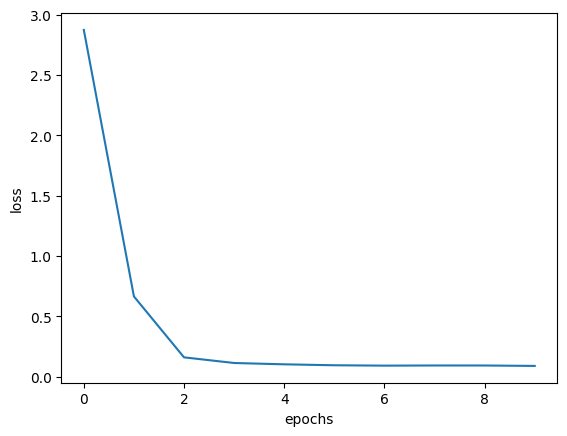

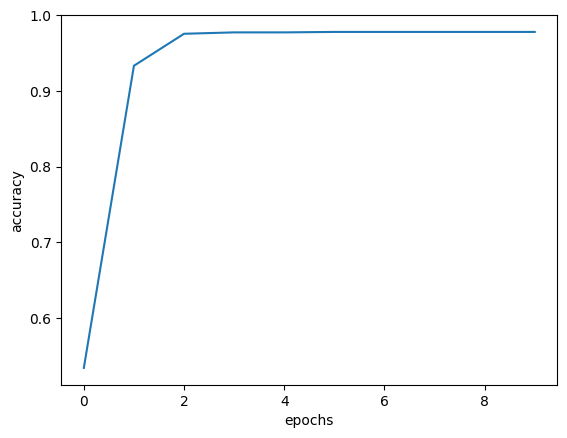

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()


In [27]:
pred=np.argmax(prediction, axis=1)
original=y_test[0]
print(original[41])

15


In [28]:
print(y_test.shape[0])

42


## menghitung confision matrix dengan menggunakan jumlah prediksi yang benar dibagi dengan jumlah total data pengujian.

In [29]:
confusion = confusion_matrix(original,pred)

fig = px.imshow(confusion, labels=dict(x="Predicted Value", y="Actual Vlaue"),text_auto=True, title='Confusion Matrix')
fig.update_layout(title_x=0.5)
fig.show()

In [30]:
count=0
for i in range(41):
    if(pred[i]-original[i]!=0):
        count+=1

Test_accuracy=(42-count)/42*100
for i in range(10):
    print(f"Predicted: {pred[i]}, Actual: {original[i]}")

Predicted: 15, Actual: 15
Predicted: 4, Actual: 4
Predicted: 16, Actual: 16
Predicted: 9, Actual: 9
Predicted: 14, Actual: 14
Predicted: 33, Actual: 33
Predicted: 1, Actual: 1
Predicted: 12, Actual: 12
Predicted: 17, Actual: 17
Predicted: 6, Actual: 6


In [31]:
print("Test Data Accuracy using ANN=",Test_accuracy,"%")

Test Data Accuracy using ANN= 100.0 %


## Model Random Forest

In [32]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

<ipython-input-32-00173ff311c1>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(random_state=42)

In [33]:
rf_predictions = clf.predict(x_test)
print(len(rf_predictions))

42


## mengukur performa model Random Forest dengan menghitung mean absolute error (MAE), mean squared error (MSE), dan R-squared pada data pengujian

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, rf_predictions)
mse = mean_squared_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
R-squared: 1.0


In [35]:
count=0
for i in range(41):
    if(rf_predictions[i]-original[i]!=0):
        count+=1

rf_Test_accuracy=(42-count)/42*100

In [36]:
print(f"Random Forest Test Accuracy:",Test_accuracy,'%')

Random Forest Test Accuracy: 100.0 %


## Saving the Model

In [37]:
from joblib import dump,load

In [38]:
filename = 'rf_model.joblib'
model = clf
dump(model, filename)

['rf_model.joblib']

In [39]:
ml_model=load('rf_model.joblib')

In [40]:
inp = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
# Reshape the 1D array into a 2D array with 1 row and 48 columns
inp = inp.reshape(1,-1)
# Make the prediction
prediksi = ml_model.predict(inp)
print(prediksi)

[30]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [41]:
prediksiPenyakit = le.classes_[prediksi[0]]
print("Penyakit yang diderita:", prediksiPenyakit)


Penyakit yang diderita: Migraine
